In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,cross_val_score,KFold
import warnings
warnings.filterwarnings('ignore')

Feature Engineering,EDA,Data cleaning

In [ ]:
data = pd.read_csv(path + "/creditcard.csv")
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

data contains confidential info thats why exact columns name are not given
data is provided after applying pca.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


No null values,correct data types


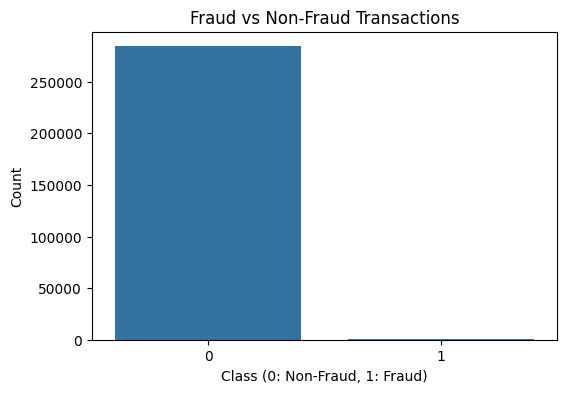

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

dataset is imbalanced


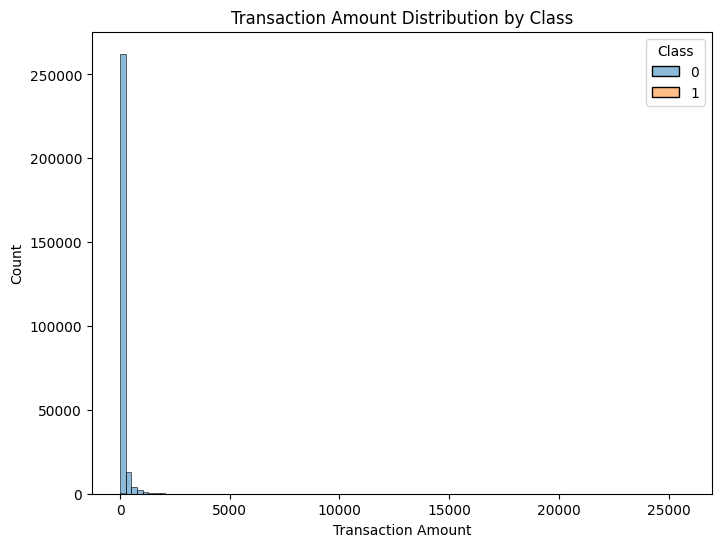

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Amount', hue='Class', bins=100)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

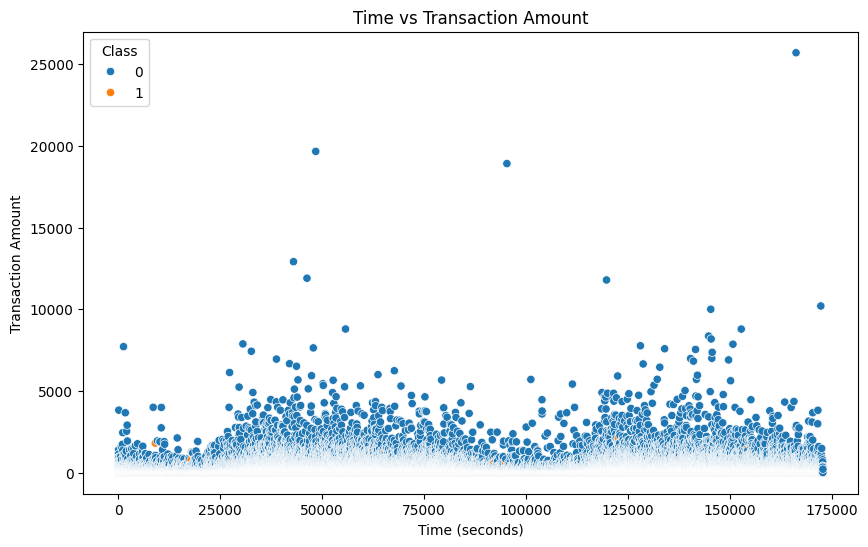

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

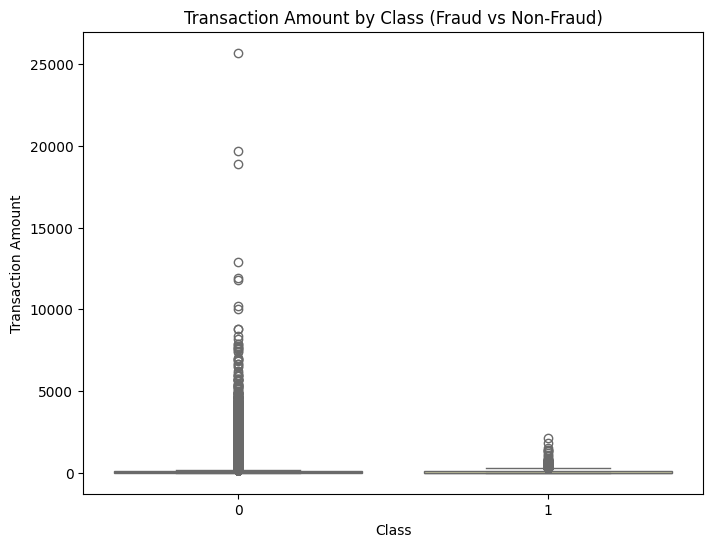

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Class', y='Amount', palette='Set3')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

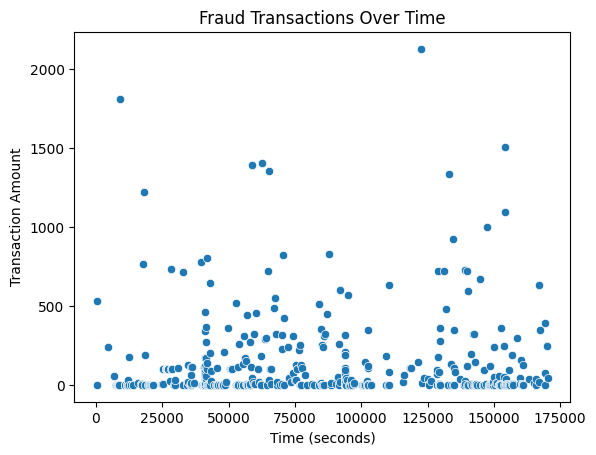

In [ ]:

fraud = data[data['Class'] == 1]
fig = sns.scatterplot(x='Time', y='Amount', data=fraud)
plt.title('Fraud Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()


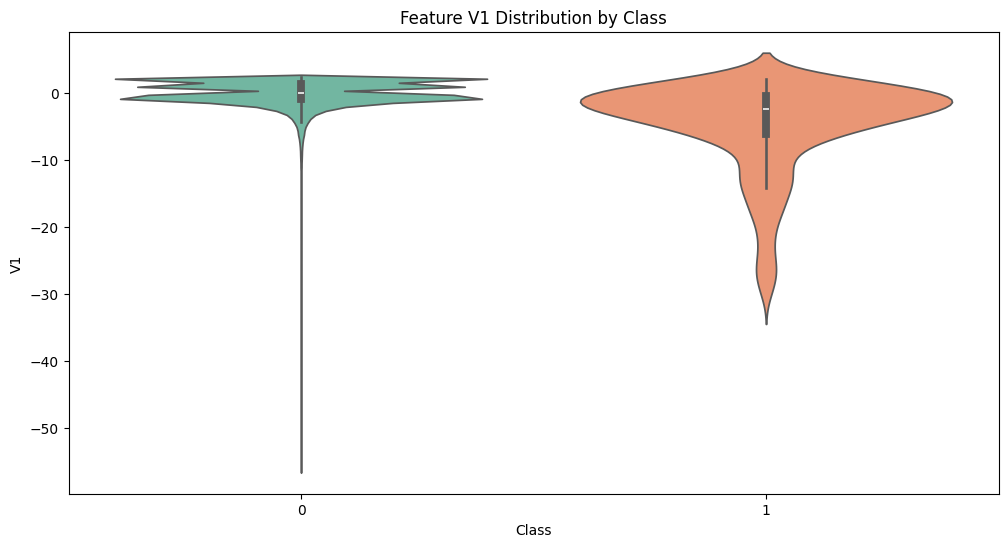

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Class', y='V1', palette='Set2')
plt.title('Feature V1 Distribution by Class')
plt.show()

Data Preprocessing

In [ ]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:

# Separate majority and minority classes
df_majority = data[data.Class == 0]
df_minority = data[data.Class == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=100000,
                                 random_state=1)


In [ ]:

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=100000,
                                   random_state=1)

Final_df = pd.concat([df_majority_downsampled, df_minority_upsampled])
print(Final_df.Class.value_counts())


Class
0    100000
1    100000
Name: count, dtype: int64


In [ ]:
Final_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106066,69808.0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00,0
102005,68015.0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89,0
278450,168231.0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99,0
120218,75751.0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80,0
258527,158694.0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48,0


In [ ]:
X=Final_df.drop('Class',axis=1)
Y=Final_df['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,shuffle=True,random_state=2)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train,shuffle=True,random_state=2)

In [ ]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
x_val=ss.transform(x_val)

Model Training

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
log_pred=log_reg.predict(x_val)
log_acc=accuracy_score(y_val,log_pred)
print("Val Accuracy Score: ",log_acc)

log_train_pred=log_reg.predict(x_train)
log_train_acc=accuracy_score(y_train,log_train_pred)
print("Train Accuracy Score: ",log_train_acc)

log_test_pred=log_reg.predict(x_test)
log_test_acc=accuracy_score(y_test,log_test_pred)
print("Test Accuracy Score: ",log_test_acc)

Val Accuracy Score:  0.946875
Train Accuracy Score:  0.94940625
Test Accuracy Score:  0.9484


In [ ]:
#hyperparameter tunning logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}
random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=5, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 300, 'C': 0.01}


Val Accuracy Score:  0.94803125
Train Accuracy Score:  0.95040625
Test Accuracy Score:  0.94975


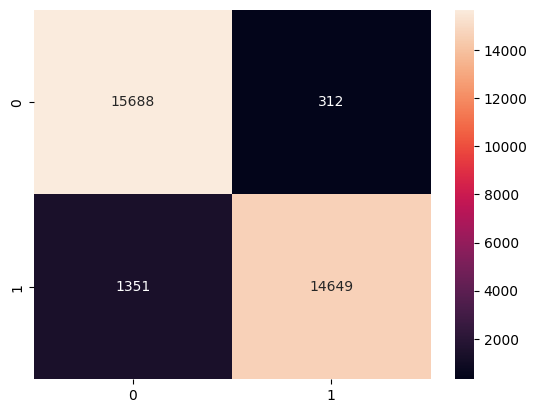

In [ ]:
bes_log=random_search.best_estimator_
bes_log.fit(x_train,y_train)
bes_log_pred=bes_log.predict(x_val)
bes_log_acc=accuracy_score(y_val,bes_log_pred)
print("Val Accuracy Score: ",bes_log_acc)

bes_log_train_pred=bes_log.predict(x_train)
bes_log_train_acc=accuracy_score(y_train,bes_log_train_pred)
print("Train Accuracy Score: ",bes_log_train_acc)

bes_log_test_pred=bes_log.predict(x_test)
bes_log_test_acc=accuracy_score(y_test,bes_log_test_pred)
print("Test Accuracy Score: ",bes_log_test_acc)

cm=confusion_matrix(y_val,bes_log_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

ROC AUC Score: 0.9865380499999999


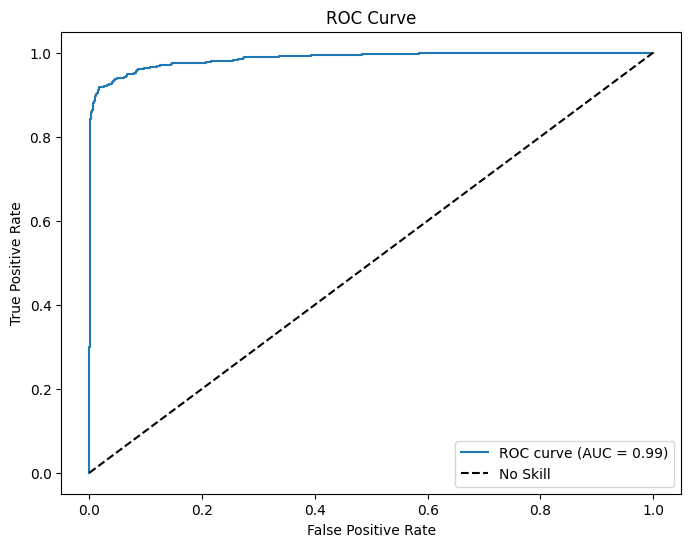

In [ ]:
bes_log_prob = bes_log.predict_proba(x_test)[:, 1]

#ROC AUC score
roc_auc = roc_auc_score(y_test, bes_log_prob)
print(f"ROC AUC Score: {roc_auc}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, bes_log_prob)

#ROC curve plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_val)
dt_acc = accuracy_score(y_val, dt_pred)
print("Val Accuracy Score (Decision Tree): ", dt_acc)

dt_train_pred = dt_model.predict(x_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
print("Train Accuracy Score (Decision Tree): ", dt_train_acc)

dt_test_pred = dt_model.predict(x_test)
dt_test_acc = accuracy_score(y_test, dt_test_pred)
print("Test Accuracy Score (Decision Tree): ", dt_test_acc)

Val Accuracy Score (Decision Tree):  0.99909375
Train Accuracy Score (Decision Tree):  1.0
Test Accuracy Score (Decision Tree):  0.9995


no need of hyper parameter tunning result is good

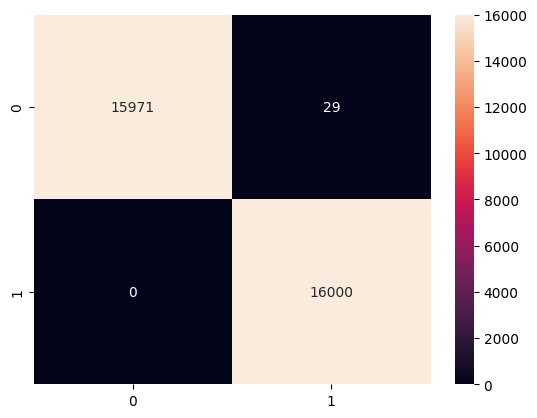

In [ ]:
cm=confusion_matrix(y_val,dt_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

ROC AUC Score (Decision Tree): 0.9994999999999999


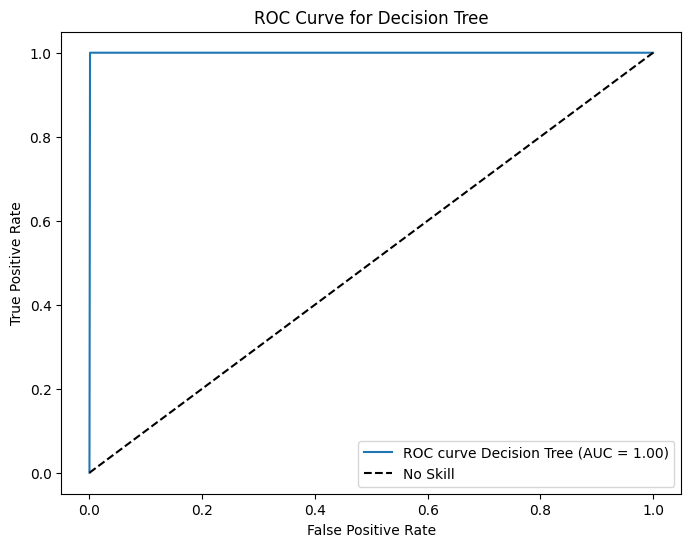

In [ ]:
dt_prob = dt_model.predict_proba(x_test)[:, 1]

roc_auc_dt = roc_auc_score(y_test, dt_prob)
print(f"ROC AUC Score (Decision Tree): {roc_auc_dt}")

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC curve Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

No need to try any other model this is giving almost perfect accuracy


just trying other model to see their performance but there is no need of this

In [ ]:
#SVM
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)

svm_pred = svm_model.predict(x_val)
svm_acc = accuracy_score(y_val, svm_pred)
print("Val Accuracy Score (SVM): ", svm_acc)

svm_train_pred = svm_model.predict(x_train)
svm_train_acc = accuracy_score(y_train, svm_train_pred)
print("Train Accuracy Score (SVM): ", svm_train_acc)

svm_test_pred = svm_model.predict(x_test)
svm_test_acc = accuracy_score(y_test, svm_test_pred)
print("Test Accuracy Score (SVM): ", svm_test_acc)


Val Accuracy Score (SVM):  0.9860625
Train Accuracy Score (SVM):  0.98728125
Test Accuracy Score (SVM):  0.9865


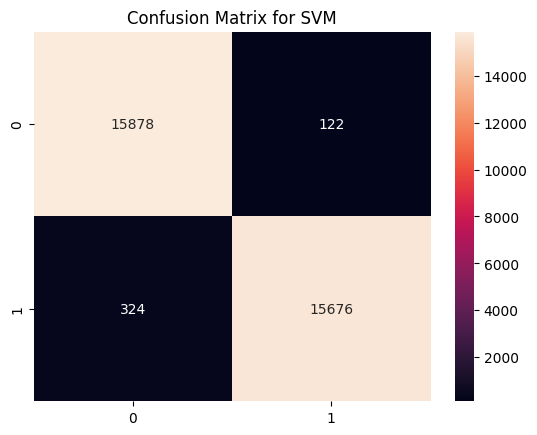

ROC AUC Score (SVM): 0.9988329375


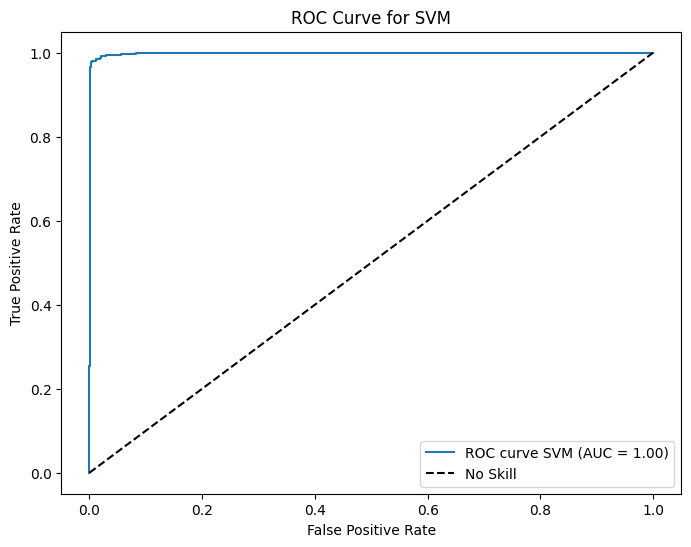

In [ ]:
#confusion matrix
cm_svm = confusion_matrix(y_val, svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('Confusion Matrix for SVM')
plt.show()
#roc auc score
svm_prob = svm_model.predict_proba(x_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, svm_prob)
print(f"ROC AUC Score (SVM): {roc_auc_svm}")
#auc
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_prob)
#plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'ROC curve SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()


In [ ]:
#gaussian nb
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

gnb_pred = gnb_model.predict(x_val)
gnb_acc = accuracy_score(y_val, gnb_pred)
print("Val Accuracy Score (Gaussian Naive Bayes): ", gnb_acc)

gnb_train_pred = gnb_model.predict(x_train)
gnb_train_acc = accuracy_score(y_train, gnb_train_pred)
print("Train Accuracy Score (Gaussian Naive Bayes): ", gnb_train_acc)

gnb_test_pred = gnb_model.predict(x_test)
gnb_test_acc = accuracy_score(y_test, gnb_test_pred)
print("Test Accuracy Score (Gaussian Naive Bayes): ", gnb_test_acc)


Val Accuracy Score (Gaussian Naive Bayes):  0.91484375
Train Accuracy Score (Gaussian Naive Bayes):  0.9175703125
Test Accuracy Score (Gaussian Naive Bayes):  0.917025


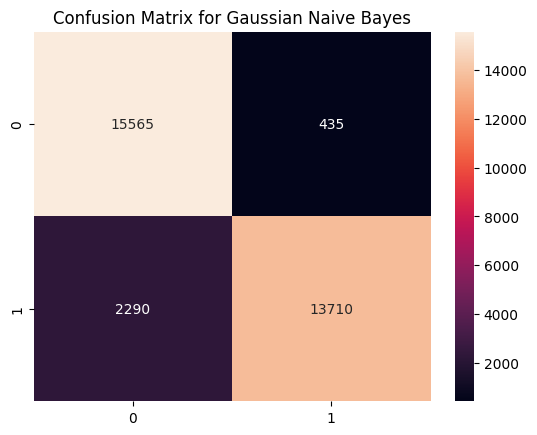

ROC AUC Score (Gaussian Naive Bayes): 0.9607190312499999


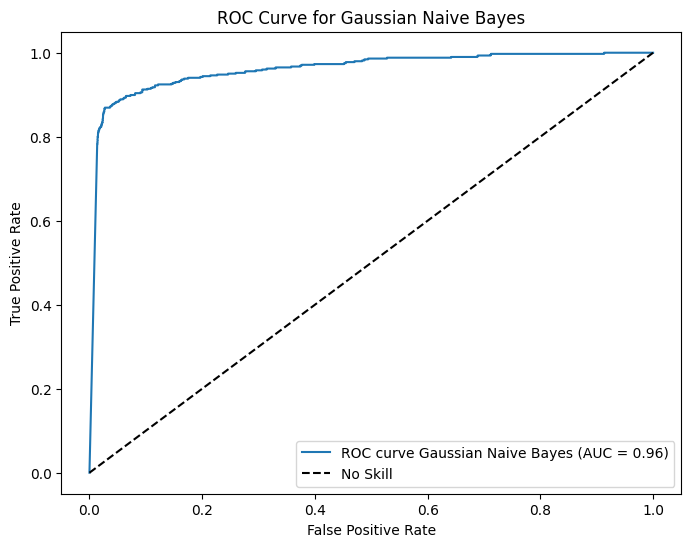

In [ ]:
#confusion matrix
cm_gnb = confusion_matrix(y_val, gnb_pred)
sns.heatmap(cm_gnb, annot=True, fmt='d')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()
#ROC AUC score
gnb_prob = gnb_model.predict_proba(x_test)[:, 1]
roc_auc_gnb = roc_auc_score(y_test, gnb_prob)
print(f"ROC AUC Score (Gaussian Naive Bayes): {roc_auc_gnb}")
#ROC curve
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb_prob)
#plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f'ROC curve Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend()
plt.show()

In [ ]:
#kneighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

knn_pred = knn_model.predict(x_val)
knn_acc = accuracy_score(y_val, knn_pred)
print("Val Accuracy Score (K Nearest Neighbors): ", knn_acc)

knn_train_pred = knn_model.predict(x_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print("Train Accuracy Score (K Nearest Neighbors): ", knn_train_acc)

knn_test_pred = knn_model.predict(x_test)
knn_test_acc = accuracy_score(y_test, knn_test_pred)
print("Test Accuracy Score (K Nearest Neighbors): ", knn_test_acc)


Val Accuracy Score (K Nearest Neighbors):  0.999
Train Accuracy Score (K Nearest Neighbors):  0.9991875
Test Accuracy Score (K Nearest Neighbors):  0.998575


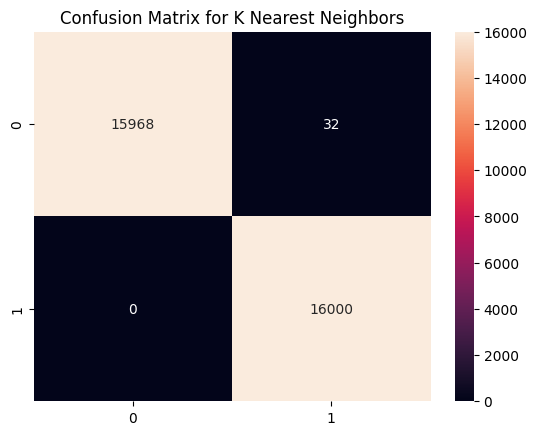

ROC AUC Score (K Nearest Neighbors): 0.999475


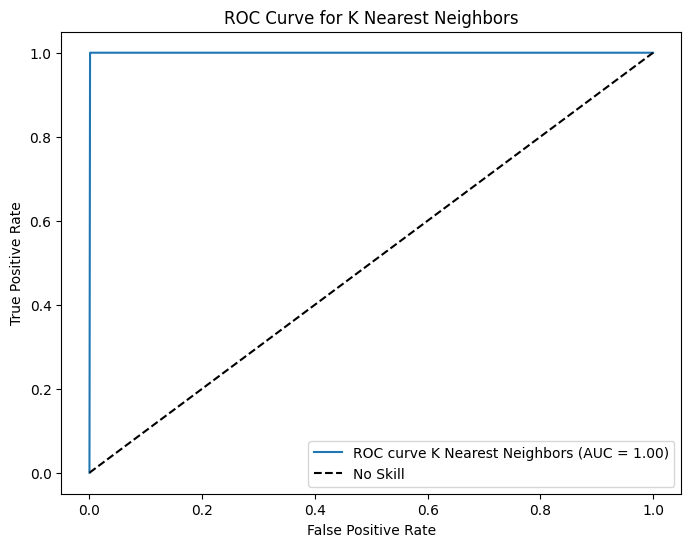

In [ ]:
#confusion matrix
cm_knn = confusion_matrix(y_val, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('Confusion Matrix for K Nearest Neighbors')
plt.show()
#roc auc score
knn_prob = knn_model.predict_proba(x_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, knn_prob)
print(f"ROC AUC Score (K Nearest Neighbors): {roc_auc_knn}")
#AUC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_prob)
#plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'ROC curve K Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K Nearest Neighbors')
plt.legend()
plt.show()


In [ ]:
#random forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_val)
rf_acc = accuracy_score(y_val, rf_pred)
print("Val Accuracy Score (Random Forest): ", rf_acc)

rf_train_pred = rf_model.predict(x_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print("Train Accuracy Score (Random Forest): ", rf_train_acc)

rf_test_pred = rf_model.predict(x_test)
rf_test_acc = accuracy_score(y_test, rf_test_pred)
print("Test Accuracy Score (Random Forest): ", rf_test_acc)

Val Accuracy Score (Random Forest):  0.99996875
Train Accuracy Score (Random Forest):  1.0
Test Accuracy Score (Random Forest):  0.9999


no need of hyperparameter tunning giving good result with hpt

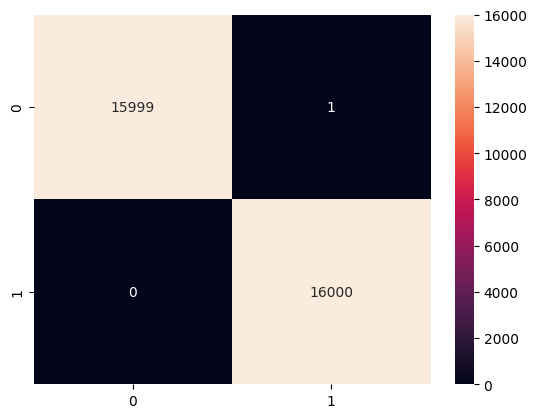

ROC AUC Score (Random Forest): 0.9999750000000001


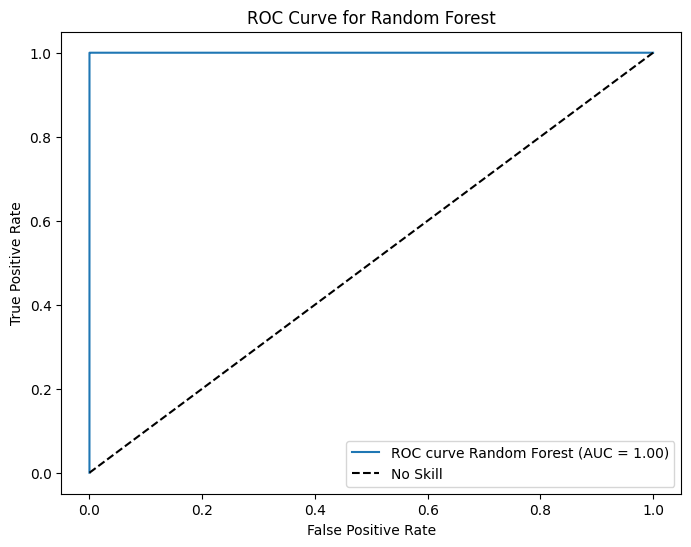

In [ ]:
#confusion matrix
cm=confusion_matrix(y_val,rf_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()
#roc auc score
rf_prob = rf_model.predict_proba(x_test)[:, 1]

roc_auc_rf = roc_auc_score(y_test, rf_prob)
print(f"ROC AUC Score (Random Forest): {roc_auc_rf}")
#AUC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_prob)
#plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

In [ ]:
#XGB classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_val)
xgb_acc = accuracy_score(y_val, xgb_pred)
print("Val Accuracy Score (XGBoost): ", xgb_acc)

xgb_train_pred = xgb_model.predict(x_train)
xgb_train_acc = accuracy_score(y_train, xgb_train_pred)
print("Train Accuracy Score (XGBoost): ", xgb_train_acc)

xgb_test_pred = xgb_model.predict(x_test)
xgb_test_acc = accuracy_score(y_test, xgb_test_pred)
print("Test Accuracy Score (XGBoost): ", xgb_test_acc)

Val Accuracy Score (XGBoost):  0.9999375
Train Accuracy Score (XGBoost):  1.0
Test Accuracy Score (XGBoost):  0.999875


no need of hpt

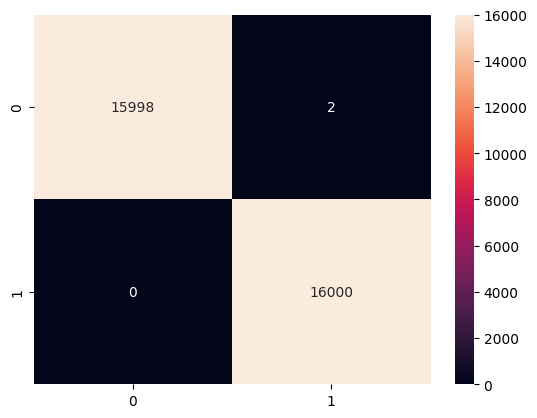

In [ ]:
#confusion matrix
cm=confusion_matrix(y_val,xgb_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()